**Firstly, I install the necessary dependencies.**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


**Loading the Dataset**

In [ ]:
data = pd.read_csv('/content/Mushroom_data.csv')
print("Dataset shape:", data.shape)
data.head()

Dataset shape: (61069, 21)


,class,cap-diameter,cap-shape,cap-surface,cap-shade,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-tallness,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,location,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


**Data Exploration**

Shape of the dataset: (61069, 21)

Columns:
 Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-shade',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-tallness', 'stem-width', 'stem-root', 'stem-surface',
       'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type',
       'spore-print-color', 'location', 'season'],
      dtype='object')

Missing values per column:
 class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-shade                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-tallness               0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color   

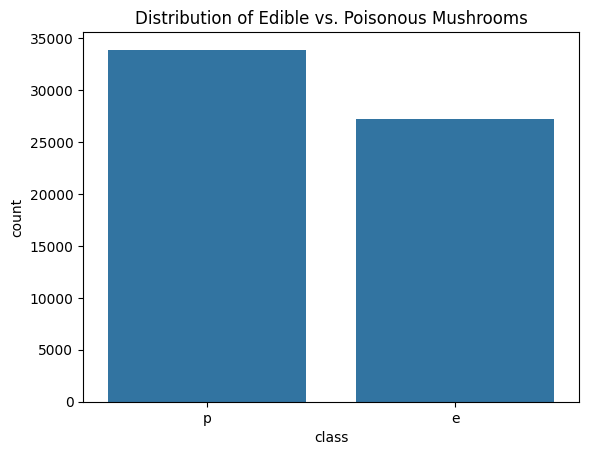

In [ ]:
print("Shape of the dataset:", data.shape)
print("\nColumns:\n", data.columns)
print("\nMissing values per column:\n", data.isnull().sum())

sns.countplot(x='class', data=data)
plt.title('Distribution of Edible vs. Poisonous Mushrooms')
plt.show()

**Data Preprocessing**

In [ ]:
df = data.copy()

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

X = df.drop('class', axis=1)
y = df['class']

**splitting the data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (48855, 20)
Testing set size: (12214, 20)


**I use multiple models to train.**

**Firstly,** Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = data.drop("class", axis=1)
y = data["class"]

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.84951694776486
              precision    recall  f1-score   support

           e       0.83      0.84      0.83      5436
           p       0.87      0.86      0.86      6778

    accuracy                           0.85     12214
   macro avg       0.85      0.85      0.85     12214
weighted avg       0.85      0.85      0.85     12214



**Second**,
Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.998526281316522
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      5436
           p       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



**Thirdly,**
Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9999181267398067
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      5436
           p       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



**Bar Chart of Best Model**

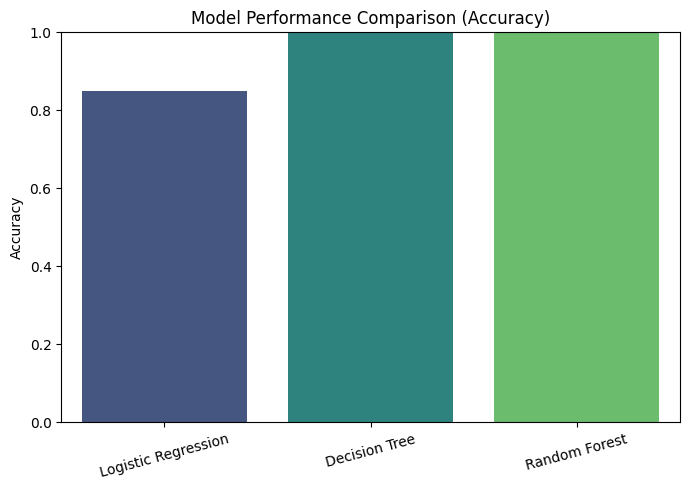

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_rf)
]

plt.figure(figsize=(7, 5))
sns.barplot(x=models, y=accuracies, hue=models, palette='viridis', legend=False)
plt.title('Model Performance Comparison (Accuracy)')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()